In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#to load csv
df = pd.read_csv('ch2_data.csv')
len(df)

11914

In [3]:
#look at first rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#data cleaning!
#look at column names and change all upper case to lowercase
#change all column names that have spaces to have underscores

df.columns = df.columns.str.lower().str.replace(' ', '_')

#this was done after making the strings... we want to change values like we did column names
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [5]:
#just to see column names would be 
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
#to see the first five rows... remember the first one starts with a 0
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#need to look at values.. sometimes all caps, sometimes lowercase
#first look at all the values and look for "object" because that is a string
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
#to get an index of all column names that have string values
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [9]:
#to make the index into a python list
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [12]:
df.dtypes
#float64 and int64 are numerical data

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# Exploratory data analysis

In [13]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [14]:
#to look at first 5 unique values in the columns
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    #to show how many unique values are in the columns
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<AxesSubplot:xlabel='msrp', ylabel='Count'>

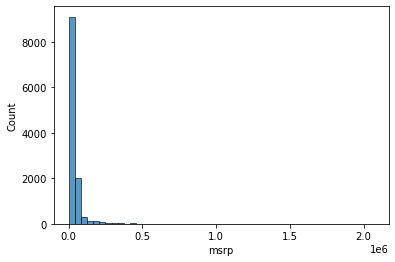

In [15]:
#look at the distribution of prices
sns.histplot(df.msrp, bins =50)
#bins makes bars smaller or larger

<AxesSubplot:xlabel='msrp', ylabel='Count'>

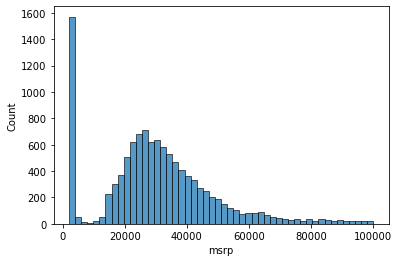

In [16]:
#leg = $1,000,000, so 2.0 is $2 million
#to zoom in a bit because there are long tail outliers
sns.histplot(df.msrp[df.msrp < 100000], bins =50)


In [17]:
#to get rid of long tail, apply log to price
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [18]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

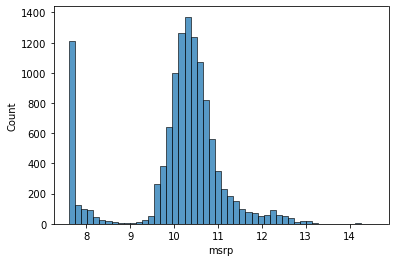

In [19]:
sns.histplot(price_logs, bins =50)

In [20]:
#let's look to see if there is any missing data... nan
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

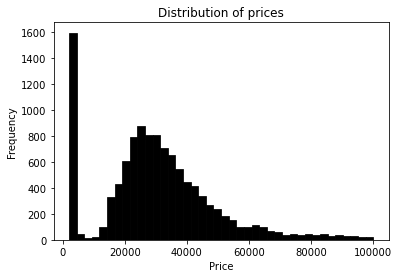

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

# Validation framework

In [22]:
#to see how many rows of data we have for entire dataset
len(df)

11914

In [23]:
#to get an integer showing 20% of the 11,914
int(len(df) * 0.2)

2382

In [25]:
#to divide up the data into 60% training, 20% testing, 20% validating
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [26]:
#to confirm total n = three subsamples
n, n_val + n_test + n_train

(11914, 11914)

In [27]:
#to look at sizes of each of the subsample dataframes
n_val, n_test, n_train

(2382, 2382, 7150)

In [28]:
#to pull data out of 11,914
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [29]:
#shuffle data
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([10302,   261,   885, ...,  3312, 11239,  1192])

In [30]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [31]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10302,chrysler,tc,1990,regular_unleaded,141.0,6.0,automatic,front_wheel_drive,2.0,luxury,compact,convertible,22,15,1013,2000
261,nissan,350z,2007,regular_unleaded,306.0,6.0,automatic,rear_wheel_drive,2.0,high-performance,compact,convertible,23,17,2009,41250
885,saab,9000,1997,regular_unleaded,200.0,4.0,manual,front_wheel_drive,4.0,"hatchback,luxury",midsize,4dr_hatchback,26,18,376,2084
9868,chevrolet,spark_ev,2014,electric,140.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,109,128,1385,27010
11587,volvo,xc60,2016,regular_unleaded,325.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,23,17,870,46950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,maserati,ghibli,2015,premium_unleaded_(required),345.0,6.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,high-performance",midsize,sedan,25,15,238,69800
2483,dodge,charger,2015,regular_unleaded,292.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,sedan,31,19,1851,27995
4135,cadillac,escalade_ext,2013,flex-fuel_(premium_unleaded_recommended/e85),403.0,8.0,automatic,all_wheel_drive,4.0,"crossover,flex_fuel,luxury,performance",large,crew_cab_pickup,18,13,1624,69640
3548,aston_martin,dbs,2012,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,coupe,18,12,259,284976


In [32]:
#Alexey's validation code... set a seed
#np.random.seed(2)

#n = len(df)

#n_val = int(0.2 * n)
#n_test = int(0.2 * n)
#n_train = n - (n_val + n_test)

#idx = np.arange(n)
#np.random.shuffle(idx)

#df_shuffled = df.iloc[idx]

#df_train = df_shuffled.iloc[:n_train].copy()
#df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
#df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [33]:
np.random.seed(2)
#to reset index column
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
#Alexey's training code we go back to numpy
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [35]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chrysler,tc,1990,regular_unleaded,141.0,6.0,automatic,front_wheel_drive,2.0,luxury,compact,convertible,22,15,1013
1,nissan,350z,2007,regular_unleaded,306.0,6.0,automatic,rear_wheel_drive,2.0,high-performance,compact,convertible,23,17,2009
2,saab,9000,1997,regular_unleaded,200.0,4.0,manual,front_wheel_drive,4.0,"hatchback,luxury",midsize,4dr_hatchback,26,18,376
3,chevrolet,spark_ev,2014,electric,140.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,109,128,1385
4,volvo,xc60,2016,regular_unleaded,325.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,23,17,870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,maserati,ghibli,2015,premium_unleaded_(required),345.0,6.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,high-performance",midsize,sedan,25,15,238
7146,dodge,charger,2015,regular_unleaded,292.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,sedan,31,19,1851
7147,cadillac,escalade_ext,2013,flex-fuel_(premium_unleaded_recommended/e85),403.0,8.0,automatic,all_wheel_drive,4.0,"crossover,flex_fuel,luxury,performance",large,crew_cab_pickup,18,13,1624
7148,aston_martin,dbs,2012,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,coupe,18,12,259


# 2.5 Linear regression

In [36]:
df_train.iloc[10]

make                                  lincoln
model                                town_car
year                                     2011
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               239.0
engine_cylinders                          8.0
transmission_type                   automatic
driven_wheels                rear_wheel_drive
number_of_doors                           4.0
market_category              flex_fuel,luxury
vehicle_size                            large
vehicle_style                           sedan
highway_mpg                                24
city_mpg                                   16
popularity                                 61
Name: 10, dtype: object

In [37]:
#look at horsepower, mpg, and popularity
xi = [239, 16, 61]

In [38]:
def g(xi):
    # do something-- we need to add to this
    return 10000

In [39]:
w0 = 0
w = [1, 1, 1]
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [40]:
linear_regression(xi)
# all of this stuff above is just for one car. Below is the entire code for the training dataframe

316

# 2.6 generalize code for a linear regression

In [41]:
def dot(xi, w):
    n = len(xi)
    
    res = w0
    
    for j in range(n):
        res = res + w[j] * xi[j]
    
    return res

In [42]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [43]:
w_new = [w0] + w

def linear_regression(xi):
        xi = [1] + xi
        return dot(xi, w_new)
    
linear_regression(xi)

316

# Training linear regression Alexey's code

In [44]:
#Alexey's linear regression code

#def train_linear_regression(X, y):
#    ones = np.ones(X.shape[0])
#    X = np.column_stack([ones, X])

#    XTX = X.T.dot(X)
#    XTX_inv = np.linalg.inv(XTX)
#    w = XTX_inv.dot(X.T).dot(y)
    
#    return w[0], w[1:]

In [45]:
def train_linear_regression(X, y):
    
# create baseline
    ones = np.ones(X.shape[0])
    
# put baseline values into a column
    X = np.column_stack([ones,X])
    
#normal equation    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
# return results    
    return w[0], w[1:]

In [46]:
train_linear_regression(X, y)

NameError: name 'X' is not defined

In [47]:
#of course I get an error!

# 2.8 Car price baseline model

In [48]:
#take a look at the training dataframe
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chrysler,tc,1990,regular_unleaded,141.0,6.0,automatic,front_wheel_drive,2.0,luxury,compact,convertible,22,15,1013
1,nissan,350z,2007,regular_unleaded,306.0,6.0,automatic,rear_wheel_drive,2.0,high-performance,compact,convertible,23,17,2009
2,saab,9000,1997,regular_unleaded,200.0,4.0,manual,front_wheel_drive,4.0,"hatchback,luxury",midsize,4dr_hatchback,26,18,376
3,chevrolet,spark_ev,2014,electric,140.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,109,128,1385
4,volvo,xc60,2016,regular_unleaded,325.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,23,17,870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,maserati,ghibli,2015,premium_unleaded_(required),345.0,6.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,high-performance",midsize,sedan,25,15,238
7146,dodge,charger,2015,regular_unleaded,292.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,sedan,31,19,1851
7147,cadillac,escalade_ext,2013,flex-fuel_(premium_unleaded_recommended/e85),403.0,8.0,automatic,all_wheel_drive,4.0,"crossover,flex_fuel,luxury,performance",large,crew_cab_pickup,18,13,1624
7148,aston_martin,dbs,2012,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,coupe,18,12,259


In [49]:
# to look at the df to find numerical colums (look for float64 and int64)
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [50]:
#build a model with some of the columns that are numerical/have float64 or int64
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,141.0,6.0,22,15,1013
1,306.0,6.0,23,17,2009
2,200.0,4.0,26,18,376
3,140.0,0.0,109,128,1385
4,325.0,6.0,23,17,870
...,...,...,...,...,...
7145,345.0,6.0,25,15,238
7146,292.0,6.0,31,19,1851
7147,403.0,8.0,18,13,1624
7148,510.0,12.0,18,12,259


In [51]:
#make sure to check to see if there are missing values
df_train[base].isnull().sum()


engine_hp           34
engine_cylinders    23
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [52]:
#we do have missing values in engine_hp and engine_cylinders, so fill them with 0
df_train[base].fillna(0).isnull().sum()



engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [53]:
#extract the values from here
X_train = df_train[base].fillna(0).values

In [54]:
train_linear_regression(X_train, y_train)

(7.961058765053135,
 array([ 9.54736607e-03, -1.57132108e-01,  1.39764000e-02,  1.57488816e-02,
        -1.15486638e-05]))

In [55]:
#to get weights which are w0
w0, w = train_linear_regression(X_train, y_train)

In [56]:
#now we want to apply this trained model to the dataset to get predictions
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

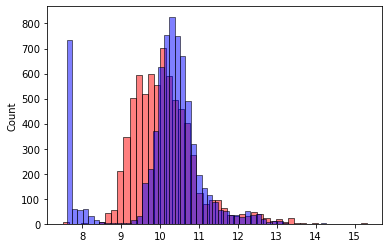

In [57]:
#to plot predictions and get a histogram from the seaborn library
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins=50)

In [58]:
#based upon histograms above, red predictions are less and different than blue training data
#so eyeballing it means this is not a good model
#but to get a more objective test to see if it's a good model fit
#we use RMSE = root means square error

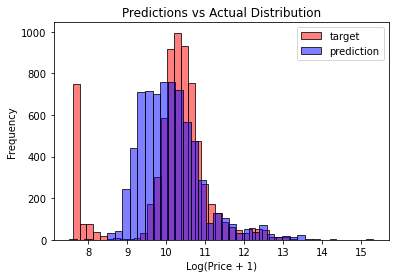

In [59]:
#for a more detailed chart
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.5, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs Actual Distribution')

plt.show()

# 2.9 RMSE to get an objective model fit test

In [60]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

0.7484850963494664

# 2.10 Validating the model

In [61]:
#prepare a new dataframe
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [62]:
#train new dataframe and run another RMSE test and compare results to what you
#got above

#the first 2 lines are for training data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#this is for the validation data
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7555062613702836

# 2.11 adding more to the model, Simple feature engineering

In [63]:
#to see when this data was collected
df_train.year.max()

2017

In [64]:
#to compute how old the cars are and use it in a new dataframe
def prepare_X(df):
    df = df.copy()   #this makes a copy so you don't screw up the original data
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)

In [65]:
#run same code as 2.10 to see if model improved (yes, it went down to 0.52725)
#the first 2 lines are for training data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#this is for the validation data
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5272524411964837

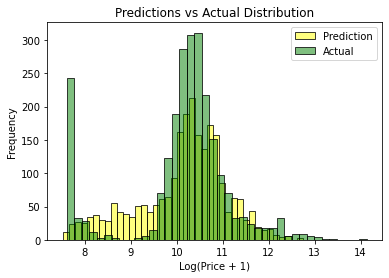

In [66]:
#to plot out the results visually
plt.figure(figsize=(6, 4))

sns.histplot(y_pred, label='Prediction', color='yellow', alpha=0.5, bins=40)
sns.histplot(y_val, label='Actual', color='green', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs Actual Distribution')

plt.show()


# 2.12 Categorical variables

In [67]:
#to see what type of data you have, for categorical look for "object"
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [68]:
#realize that this with dataset, number of doors is categorical
#because it refers to types of cars (2 door, coupe, 4 doors)
#so we want to change this into 3 binary columns

#we can do this by these 3 lines of codes
#df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
#df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
#df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')

#or create a loop
for v in [2,3,4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v). astype('int')

In [69]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chrysler,tc,1990,regular_unleaded,141.0,6.0,automatic,front_wheel_drive,2.0,luxury,compact,convertible,22,15,1013,1,0,0
1,nissan,350z,2007,regular_unleaded,306.0,6.0,automatic,rear_wheel_drive,2.0,high-performance,compact,convertible,23,17,2009,1,0,0
2,saab,9000,1997,regular_unleaded,200.0,4.0,manual,front_wheel_drive,4.0,"hatchback,luxury",midsize,4dr_hatchback,26,18,376,0,0,1
3,chevrolet,spark_ev,2014,electric,140.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,109,128,1385,0,0,1
4,volvo,xc60,2016,regular_unleaded,325.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,23,17,870,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,maserati,ghibli,2015,premium_unleaded_(required),345.0,6.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,high-performance",midsize,sedan,25,15,238,0,0,1
7146,dodge,charger,2015,regular_unleaded,292.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,sedan,31,19,1851,0,0,1
7147,cadillac,escalade_ext,2013,flex-fuel_(premium_unleaded_recommended/e85),403.0,8.0,automatic,all_wheel_drive,4.0,"crossover,flex_fuel,luxury,performance",large,crew_cab_pickup,18,13,1624,0,0,1
7148,aston_martin,dbs,2012,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,coupe,18,12,259,1,0,0


In [70]:
def prepare_X(df):
    df = df.copy()   #this makes a copy so you don't screw up the original data
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [71]:
prepare_X(df_train)

array([[141.,   6.,  22., ...,   1.,   0.,   0.],
       [306.,   6.,  23., ...,   1.,   0.,   0.],
       [200.,   4.,  26., ...,   0.,   0.,   1.],
       ...,
       [403.,   8.,  18., ...,   0.,   0.,   1.],
       [510.,  12.,  18., ...,   1.,   0.,   0.],
       [250.,   6.,  25., ...,   0.,   0.,   1.]])

In [72]:
#run same code as 2.10 to see if model improved (yes, it went down slightly to 0.5248, but the number of 
#doors feature does not help much with predicting
#the first 2 lines are for training data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#this is for the validation data
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5248168727921603

In [73]:
#what about looking at the column called "make"? How many unique values do we have?
df.make.nunique()

48

In [74]:
#let's look at the top make values
df.make.value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [75]:
#to change the top 5 make values into a list
makes = list(df.make.value_counts().head().index)

In [76]:
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [77]:
#then we can copy and paste code and add makes to the model
def prepare_X(df):
    df = df.copy()   #this makes a copy so you don't screw up the original data
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [78]:
#run same code as 2.10 to see if model improved (yes, it went down slightly to 0.5152, but the make
#feature does not help much with predicting
#the first 2 lines are for training data
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#this is for the validation data
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5152810942290074

# 2.13 Regularization

In [79]:
#I totally don't understand what this is about
#he says it's adding a number to the diagonal
#I'm just copying his code 
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [80]:
X_train = prepare_X(df_train)

In [81]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

IndexError: index 21 is out of bounds for axis 0 with size 14

In [82]:
#where r is 0
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.5039435049570522
val 0.5152810942290074


In [83]:
#where r is 0.01
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.503944670987526
val 0.5153609626309551


In [84]:

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.5152811020492964
0.0001 0.5152818763855445
 0.001 0.5152889316468379
  0.01 0.5153609626309551
   0.1 0.5161616688322986
     1 0.5213196546418314
     5 0.5248134538056819
    10 0.5269656504643145


In [85]:
# just use this final set of code to get your first r
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.5153609626309551
test: 0.5054244249754913


# 2.14 Tuning the model

In [90]:
#copy and change the code chunk from above
for r in [0.0, 0.1, 0.001, 0.0001, 1, 10]:
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, "score=",score)   

0.0 10.286947593858155 score= 0.5152810942290074
0.1 10.286947593858155 score= 0.5161616688322986
0.001 10.286947593858155 score= 0.5152889316468379
0.0001 10.286947593858155 score= 0.5152818763855445
1 10.286947593858155 score= 0.5213196546418314
10 10.286947593858155 score= 0.5269656504643145


In [92]:
#look for the lowest score and smallest weight from above and make r = to that
r = 0.0001
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
    
print("score=",score)   

score= 0.5152818763855445


# 2.15 train the final model and use it

In [95]:
# combine df_train and df_val so we can use it all
#can use pandas
df_full_train= pd.concat([df_train, df_val])
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chrysler,tc,1990,regular_unleaded,141.0,6.0,automatic,front_wheel_drive,2.0,luxury,compact,convertible,22,15,1013,1.0,0.0,0.0
1,nissan,350z,2007,regular_unleaded,306.0,6.0,automatic,rear_wheel_drive,2.0,high-performance,compact,convertible,23,17,2009,1.0,0.0,0.0
2,saab,9000,1997,regular_unleaded,200.0,4.0,manual,front_wheel_drive,4.0,"hatchback,luxury",midsize,4dr_hatchback,26,18,376,0.0,0.0,1.0
3,chevrolet,spark_ev,2014,electric,140.0,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,109,128,1385,0.0,0.0,1.0
4,volvo,xc60,2016,regular_unleaded,325.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,23,17,870,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,honda,insight,2013,regular_unleaded,98.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,hybrid",compact,4dr_hatchback,44,41,2202,NaN,NaN,NaN
2378,hummer,h3t,2009,regular_unleaded,300.0,8.0,automatic,four_wheel_drive,4.0,"crossover,luxury",compact,crew_cab_pickup,16,13,130,NaN,NaN,NaN
2379,cadillac,cts,2015,premium_unleaded_(recommended),272.0,4.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,28,19,1624,NaN,NaN,NaN
2380,volvo,850,1996,regular_unleaded,222.0,5.0,automatic,front_wheel_drive,4.0,"luxury,performance",midsize,wagon,24,17,870,NaN,NaN,NaN


In [99]:
#to get feature matrix for X
X_full_train = prepare_X(df_full_train)
X_full_train

array([[141.,   6.,  22., ...,   0.,   0.,   0.],
       [306.,   6.,  23., ...,   0.,   0.,   0.],
       [200.,   4.,  26., ...,   0.,   0.,   0.],
       ...,
       [272.,   4.,  28., ...,   0.,   0.,   0.],
       [222.,   5.,  24., ...,   0.,   0.,   0.],
       [181.,   4.,  26., ...,   0.,   1.,   0.]])

In [101]:
#to get feature matrix for y
#can use numpy
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 7.60140233, 10.62743063,  7.64252413, ..., 10.76523762,
        7.60140233, 10.28537692])

In [102]:
#to train the training model
w0, w= train_linear_regression_reg(X_full_train, y_full_train, r=0.0001)
w

array([ 3.53252733e-03,  8.66587378e-02, -7.33755668e-03,  1.34478816e-02,
       -3.09410886e-05, -9.45205437e-02, -1.24028548e+00, -1.42813998e+00,
       -1.28047526e+00, -1.93819019e-01, -6.75116883e-02,  2.25037315e-02,
       -2.77068727e-01, -2.54809643e-01])

In [103]:
#now we need to train the testing dataset
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)
    
print("score=",score)   

score= 0.6427773380028827


In [104]:
#the ideal is that you want the score from above to be as close as possible
#to the validation score
#ours are val = 0.515 and test = 0.642
#not too good

# Using the model

In [105]:
#pick a car
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'chevrolet',
 'model': 'captiva_sport',
 'year': 2014,
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'engine_hp': 180.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,flex_fuel',
 'vehicle_size': 'midsize',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 28,
 'city_mpg': 20,
 'popularity': 1385}

In [106]:
#apply the model
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

13787.0557586108

In [107]:
#to see what the price was actually for this specific car
np.expm1(y_test[2])

24359.999999999985

In [110]:
#so I'm not impressed!
#we predicted the car would cost $13k and it really cost $24k!